# A6
## b)

P(pi/2)=1.000000 for degree=0
P(pi/2)=-0.000000 for degree=1
P(pi/2)=-1.000000 for degree=6
P(pi/2)=-0.000025 for degree=11
P(pi/2)=-0.000895 for degree=13


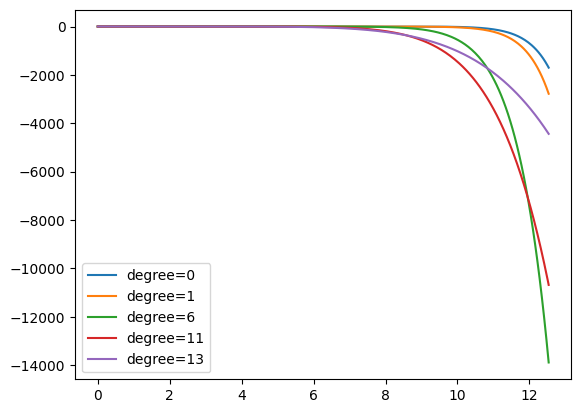

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def a_coeff(index):
    return np.sin(np.pi * index / 2) / math.factorial(index)

a_coeff = np.vectorize(a_coeff)
a_coeff_list = a_coeff(np.arange(0, 21))

def p_deriv(t, a_list=a_coeff_list, degree=0):
    m = len(a_list) - 1
    b_list = np.zeros(shape=(m+2,m+1))
    b_list[0,:m+1] = a_list[:m+1]
    for i in range(1, m+1):
        b_list[i, m] = b_list[i-1, m]
        for j in range(m, i-1, -1):
            b_list[i, j-1] = t * b_list[i, j] + b_list[i-1, j-1]
    b_list[m+1, m] = b_list[m, m]
    return b_list[degree + 1, degree] * math.factorial(degree)

p_deriv = np.vectorize(p_deriv, excluded=['a_list', 'degree'])

x = np.arange(0, 4*np.pi, np.pi/100)

fig, ax = plt.subplots()

degree_list = [0, 1, 6, 11, 13]

for degree in degree_list:
    print('P(pi/2)=%f for degree=%i' % (p_deriv(np.pi / 2, a_list=a_coeff_list, degree=degree), degree))
    p1 = p_deriv(x, a_list=a_coeff_list, degree=degree)
    ax.plot(x, p1, label='degree=%i' %degree)
ax.legend()

